In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import json
import joblib
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
# Configuration
loc = "Your folder path"

# eg . /Users/yourname/Documents/VSCode/End-End Logistic Regression- Loan Approval Classification/

## Load Dataset


In [792]:
data = pd.read_csv(loc + r"raw/loan_data.csv")

## Exploratory Data Analysis (EDA)

In [793]:
# Display the first few rows
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [794]:
data.shape

(45000, 14)

In [795]:
# Basic Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [796]:
# Checking missing values
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

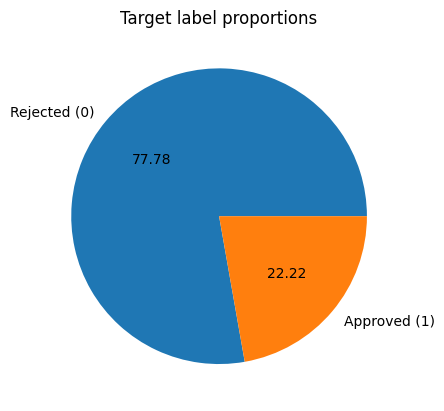

In [797]:
# Distribution of Rejected and Approved loans
label_prop = data['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

In [798]:
# Check 0/1 classes
print(data['loan_status'].value_counts())

loan_status
0    35000
1    10000
Name: count, dtype: int64


In [799]:
# Segregate Categorical and numerical features
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numeric_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [800]:
data[numeric_cols].corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


<Figure size 1200x600 with 0 Axes>

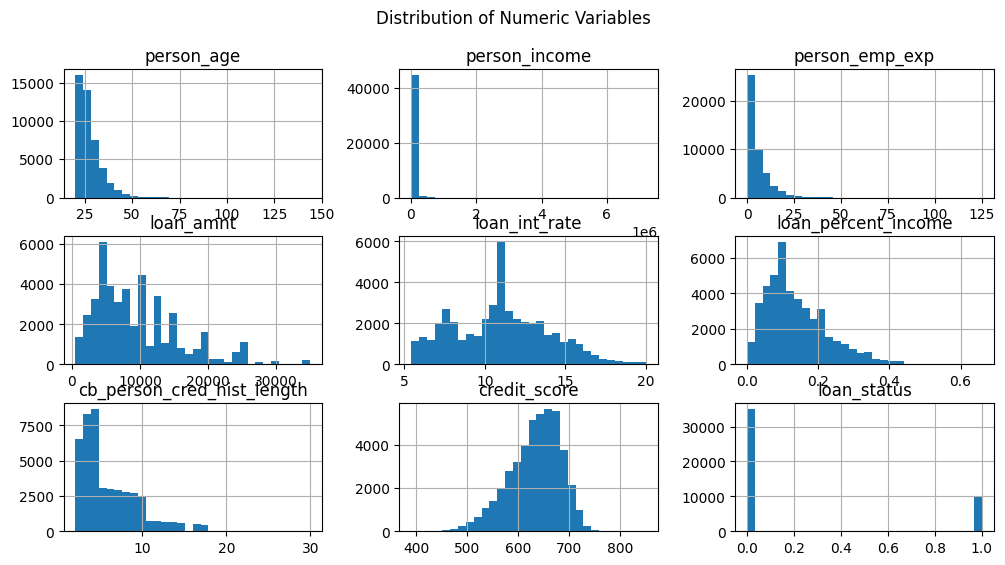

In [801]:
# Univariate analysis- Numerical variables
# Plot numeric variables
plt.figure(figsize=(12, 6))
data[numeric_cols].hist(bins=30, figsize=(12, 6))
plt.suptitle('Distribution of Numeric Variables')
plt.show()

In linear models, performing univariate analysis is crucial to understanding the distribution of each variable. This helps in identifying skewness, outliers, and potential transformations required for better model performance. From the above graphs, we observe that most of the numerical variables are right-skewed, while some exhibit a normal distribution. Recognizing these patterns allows us to apply appropriate preprocessing techniques, such as scaling or transformations, to improve the model's effectiveness.

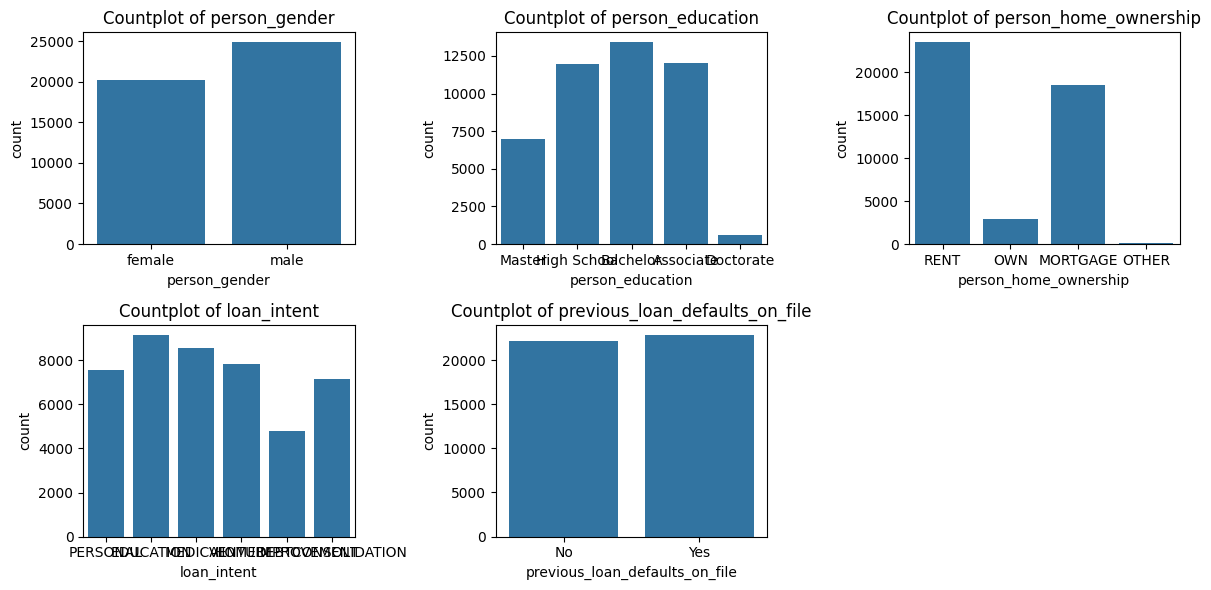

In [802]:
# Plot categorical variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

The categorical variables show a balanced distribution for gender but a higher concentration of applicants with High School and Bachelor's education. Most applicants are renters or have mortgages, and loans are primarily taken for education, medical needs, and debt consolidation. Previous loan defaults are fairly balanced, indicating potential influence on loan approval decisions.

## Feature Engineering

In [803]:
# Convert categorical variables to numerical using OneHotEncoding
# Use dummy encoding when the categorical variable has nominal categories (no inherent order)
data = pd.get_dummies(data, columns=['person_gender', 'previous_loan_defaults_on_file', 'person_home_ownership', 'loan_intent'], drop_first=True)

#Use mapping for education variable
education_mapping = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}

data['person_education'] = data['person_education'].map(education_mapping)
data = data.astype(float)

## Data Preprocessing

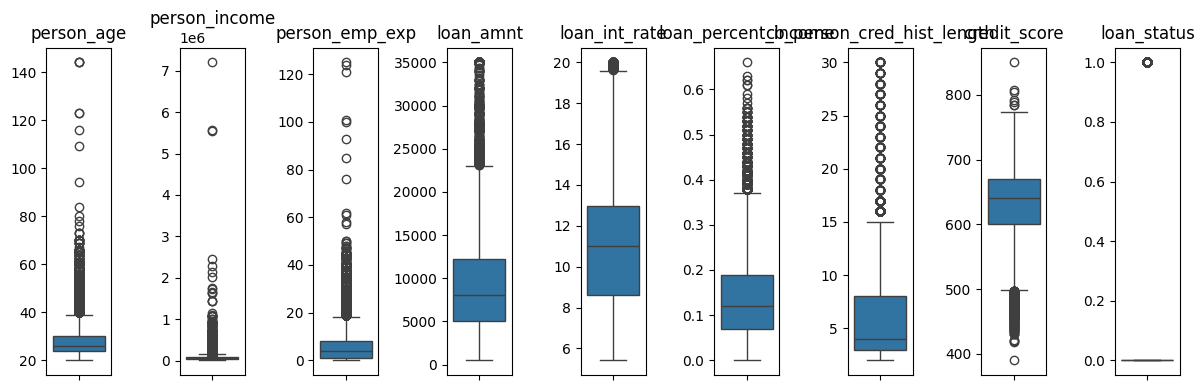

In [804]:
# Plot boxplots for all numerical columns, to detect outliers

# Set up subplots (1 row, multiple columns)
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(12, 4))

# Loop through each feature and create a boxplot
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=data[feature], ax=axes[i])
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [805]:
# Removing outliers for both classes seperately
class_0 = data[data['loan_status'] == 0]
class_1 = data[data['loan_status'] == 1]

Q1_0 = class_0[numeric_cols].quantile(0.25)
Q3_0 = class_0[numeric_cols].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

Q1_1 = class_1[numeric_cols].quantile(0.25)
Q3_1 = class_1[numeric_cols].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lower_bound_0 = Q1_0 - 1.5 * IQR_0
upper_bound_0 = Q3_0 + 1.5 * IQR_0

lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

class_0_filtered = class_0[~((class_0[numeric_cols] < lower_bound_0) | (class_0[numeric_cols] > upper_bound_0)).any(axis=1)]
class_1_filtered = class_1[~((class_1[numeric_cols] < lower_bound_1) | (class_1[numeric_cols] > upper_bound_1)).any(axis=1)]

data = pd.concat([class_0_filtered, class_1_filtered])

In [806]:
data.shape

(38149, 20)

In [720]:
# Select only numerical independent variables (excluding target variable)
X = data.drop(columns=['loan_status'])

# Add a constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                               Feature         VIF
0                                const  447.872184
1                           person_age    7.433434
2                     person_education    1.050517
3                        person_income    3.682112
4                       person_emp_exp    5.557291
5                            loan_amnt    5.531217
6                        loan_int_rate    1.078200
7                  loan_percent_income    5.726671
8           cb_person_cred_hist_length    3.049736
9                         credit_score    1.101141
10                  person_gender_male    1.000308
11  previous_loan_defaults_on_file_Yes    1.155754
12         person_home_ownership_OTHER    1.006783
13           person_home_ownership_OWN    1.150737
14          person_home_ownership_RENT    1.296937
15               loan_intent_EDUCATION    1.842253
16         loan_intent_HOMEIMPROVEMENT    1.489556
17                 loan_intent_MEDICAL    1.801082
18                loan_intent_P

Variable 'person_age', 'person_emp_exp', 'loan_amnt', and 'loan_percent_income'   have very high VIF, these could be highly correlated with other variables, I'll first try to remove one variable 'person_age' and then check the VIF again and then remove 'person_emp_exp' if the VIF is still high and so on..

In [721]:
data.drop(columns=['person_age'], inplace=True)

In [722]:
# Check VIF again
X = data.drop(columns=['loan_status'])

# Add a constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                               Feature         VIF
0                                const  245.804198
1                     person_education    1.050133
2                        person_income    3.678766
3                       person_emp_exp    2.313477
4                            loan_amnt    5.531096
5                        loan_int_rate    1.077893
6                  loan_percent_income    5.726644
7           cb_person_cred_hist_length    2.286777
8                         credit_score    1.101083
9                   person_gender_male    1.000268
10  previous_loan_defaults_on_file_Yes    1.155748
11         person_home_ownership_OTHER    1.006604
12           person_home_ownership_OWN    1.150717
13          person_home_ownership_RENT    1.296849
14               loan_intent_EDUCATION    1.838850
15         loan_intent_HOMEIMPROVEMENT    1.488176
16                 loan_intent_MEDICAL    1.801075
17                loan_intent_PERSONAL    1.708836
18                 loan_intent_

Removing 'loa_percent_income'

In [723]:
data.drop(columns=['loan_percent_income'], inplace=True)

In [724]:
# Check VIF again
X = data.drop(columns=['loan_status'])

# Add a constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                               Feature         VIF
0                                const  225.263711
1                     person_education    1.050127
2                        person_income    1.364232
3                       person_emp_exp    2.313217
4                            loan_amnt    1.178442
5                        loan_int_rate    1.073588
6           cb_person_cred_hist_length    2.286125
7                         credit_score    1.100227
8                   person_gender_male    1.000224
9   previous_loan_defaults_on_file_Yes    1.125196
10         person_home_ownership_OTHER    1.006488
11           person_home_ownership_OWN    1.148419
12          person_home_ownership_RENT    1.294071
13               loan_intent_EDUCATION    1.838849
14         loan_intent_HOMEIMPROVEMENT    1.488167
15                 loan_intent_MEDICAL    1.801019
16                loan_intent_PERSONAL    1.708824
17                 loan_intent_VENTURE    1.755265


VIF under 5, looks good.

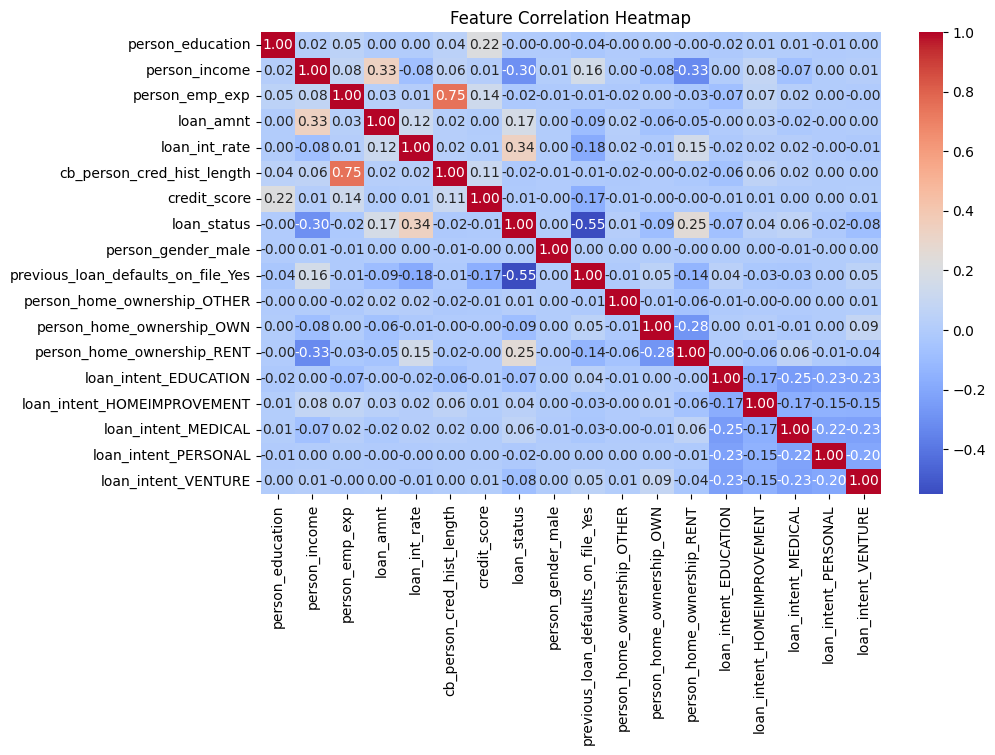

In [725]:
# Checking correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [726]:
# Correlation with target varible- loan_status
correlation_matrix = data.corr()
target_correlation = correlation_matrix['loan_status'].sort_values(ascending=False)
print(target_correlation)


loan_status                           1.000000
loan_int_rate                         0.335486
person_home_ownership_RENT            0.251401
loan_amnt                             0.170888
loan_intent_MEDICAL                   0.060546
loan_intent_HOMEIMPROVEMENT           0.040704
person_home_ownership_OTHER           0.012707
person_gender_male                    0.000446
person_education                     -0.004079
credit_score                         -0.009650
loan_intent_PERSONAL                 -0.017254
cb_person_cred_hist_length           -0.017647
person_emp_exp                       -0.024002
loan_intent_EDUCATION                -0.067022
loan_intent_VENTURE                  -0.081457
person_home_ownership_OWN            -0.088794
person_income                        -0.301001
previous_loan_defaults_on_file_Yes   -0.551762
Name: loan_status, dtype: float64


## Correlation Analysis  
- **Loan defaults** have the strongest negative impact on approval.
- **Loan interest rate** and **loan amount** positively impact approval, suggesting lender preference for profitable loans. 
- **Income** has a surprising negative correlation, which may require further investigation into non-linear effects.
- **Loan intent** affects approval rates, with venture and education loans facing stricter scrutiny.
- **Credit score** , **employment history** , **gender** and **education** have minimal correlation, indicating that lenders might weigh other financial metrics more heavily.


In [744]:
# Define Independent (X) and Dependent (Y) variables
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [745]:
# Findind top 6 features using RFE method

# Step 1: Create pipeline with scaling + model
model = LogisticRegression(solver='liblinear')  # L1 or L2 penalty
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(model, n_features_to_select=5))
])

# Step 2: Fit on data
pipeline.fit(X, y)

# Step 3: Get selected features
rfe = pipeline.named_steps['feature_selection']
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['person_income', 'loan_amnt', 'loan_int_rate',
       'previous_loan_defaults_on_file_Yes', 'person_home_ownership_OWN'],
      dtype='object')


## Train-Test Split

In [746]:
# Splitting into Train and Test Set (80-20 split)
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=14)

In [747]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [748]:
# Train Linear Regression Model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [749]:
# Get the intercept and coefficients
intercept = lr.intercept_[0]  # Intercept (bias term)
coefficients = lr.coef_[0]  # Coefficients for each feature

# Display the equation
equation = f"log(odds) = {intercept:.4f}"  # Log-odds equation
for i, col in enumerate(X_selected.columns):
    equation += f" + ({coefficients[i]:.4f} * {col})"

print("Logistic Regression Equation:")
print(equation)



Logistic Regression Equation:
log(odds) = -5.1384 + (-1.6749 * person_income) + (0.8954 * loan_amnt) + (0.9155 * loan_int_rate) + (-4.2359 * previous_loan_defaults_on_file_Yes) + (-0.4049 * person_home_ownership_OWN)


In [750]:
# Predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [751]:
# Get probability predictions (y_prob)
y_train_prob = lr.predict_proba(X_train_scaled)[:, 1]  # Probability of class 1
y_test_prob = lr.predict_proba(X_test_scaled)[:, 1]  

## Model Evaluation

In [752]:
def evaluate_model(y_true, y_pred, y_prob=None, dataset_type="Test"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{dataset_type} Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    if y_prob is not None:
        auc_roc = roc_auc_score(y_true, y_prob)
        print(f"AUC-ROC: {auc_roc:.4f}")



In [753]:
# Evaluate on Train and Test Data
evaluate_model(y_train, y_train_pred, y_train_prob, dataset_type="Train")
evaluate_model(y_test, y_test_pred, y_test_prob, dataset_type="Test")


Train Set Performance:
Accuracy: 0.8881
Precision: 0.7554
Recall: 0.7686
F1-score: 0.7619
AUC-ROC: 0.9515

Test Set Performance:
Accuracy: 0.8887
Precision: 0.7435
Recall: 0.7674
F1-score: 0.7553
AUC-ROC: 0.9511


In [754]:
# Print detailed performance metrics
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))



Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     23407
         1.0       0.76      0.77      0.76      7112

    accuracy                           0.89     30519
   macro avg       0.84      0.85      0.84     30519
weighted avg       0.89      0.89      0.89     30519

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      5923
         1.0       0.74      0.77      0.76      1707

    accuracy                           0.89      7630
   macro avg       0.84      0.85      0.84      7630
weighted avg       0.89      0.89      0.89      7630



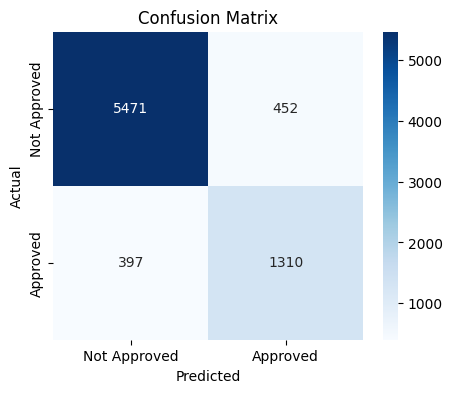

In [755]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Save final features, final model and Feature Scaler to be used in new unseen data

In [756]:
# Save final features used in model
with open("feature_list.json", "w") as f:
    json.dump(list(X_train.columns), f)

# Save final model
joblib.dump(lr, 'final_model_lr.joblib')

# Save Feature Scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

## Feature Importance

In [757]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X_selected.columns, 'Importance': lr.coef_.flatten()})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

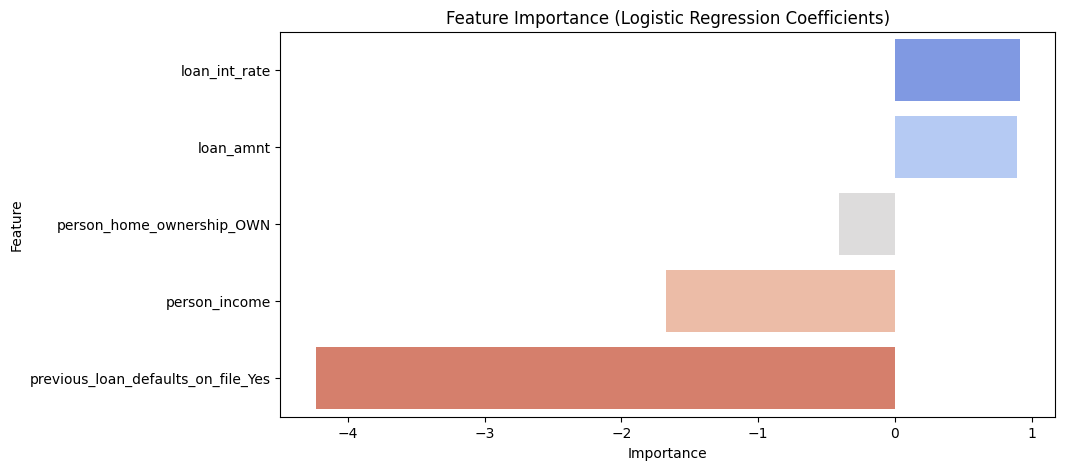

In [758]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

# Final Interpretation of the Model  

## Key Takeaways from Feature Importance (Logistic Regression Coefficients)  

### 1. Previous Loan Defaults (**Strongest Negative Impact**)  
- **Most influential factor** in determining loan approval chances.  
- If a person has **previously defaulted on a loan**, the probability of approval drops significantly.  
- This aligns with risk assessment policies in loan approvals.  

### 2. Loan Interest Rate (**Strongest Positive Impact**)  
- **Higher interest rates increase approval chances.**  
- This suggests that **lenders favor loans with higher interest**, likely due to increased profitability.  
- Borrowers with riskier profiles may receive **higher interest offers**, leading to this correlation.  

### 3. Loan Amount (**Moderate Positive Impact**)  
- **Larger loan amounts slightly increase approval probability.**  
- This may indicate that lenders **prefer structured, larger loans** over very small ones.  
- Borrowers seeking **larger loans may have stronger financial profiles**, leading to better approval odds.  

### 4. Person Income (**Moderate Negative Impact**)  
- **Higher income slightly decreases loan approval probability.**  
- This may indicate **non-linear relationships** where high-income borrowers are scrutinized more.  
- Possible explanation: **Lenders may favor borrowers with stable, moderate incomes over very high earners with inconsistent income streams.**  

### 5. Home Ownership (OWN) (**Minimal Negative Impact**)  
- **Owning a home slightly reduces loan approval probability.**  
- This may indicate that lenders **do not prioritize homeownership** as a key factor.  
- Alternatively, it could reflect that homeowners may be applying for riskier loans, leading to stricter approvals.  

---

## Conclusion  
- **Previous loan defaults have the strongest negative impact**, significantly reducing approval chances.  
- **Loan interest rates and loan amounts positively influence approvals**, indicating that lenders prioritize higher-value loans.  
- **Income has a moderate negative effect**, possibly due to non-linear scrutiny of high-income borrowers.  
- **Home ownership has minimal impact**, suggesting financial behavior is the dominant factor in loan decisions.  
